In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [5]:
heart  = pd.read_csv('HeartDisease.csv')

In [6]:
heart.sample(n=10 , random_state = 2) 

#sample : Return a random sample of items from an axis of object.
# random_state : to fix the samples displayed 

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1


In [7]:
heart.info(verbose = True)

# verbose : Whether to print the full summary. By default, the setting in
# ``pandas.options.display.max_info_columns`` is followed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
display(heart.isnull().mean()*100 , heart.duplicated().sum())

age                    0.0
gender                 0.0
chest_pain             0.0
rest_bps               0.0
cholestrol             0.0
fasting_blood_sugar    0.0
rest_ecg               0.0
thalach                0.0
exer_angina            0.0
old_peak               0.0
slope                  0.0
ca                     0.0
thalassemia            0.0
target                 0.0
dtype: float64

1

In [9]:
heart.drop_duplicates(inplace = True)
heart.duplicated().sum()

0

Feature:  age


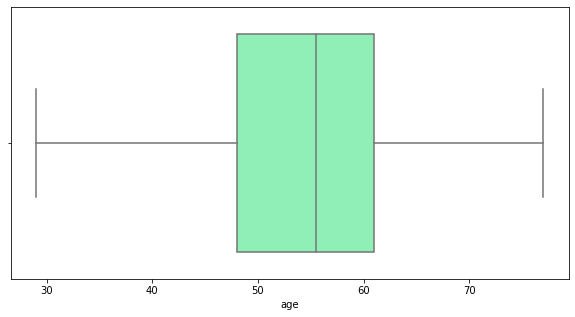

Feature:  gender


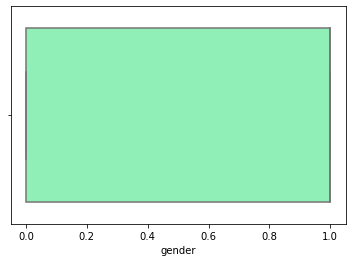

Feature:  chest_pain


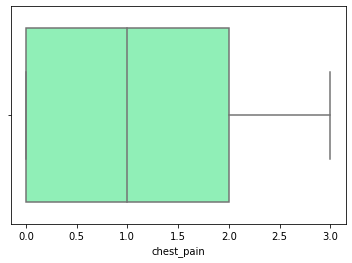

Feature:  rest_bps


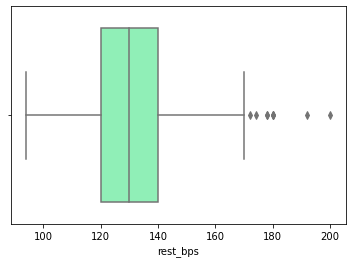

Feature:  cholestrol


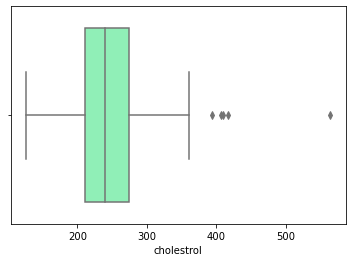

Feature:  fasting_blood_sugar


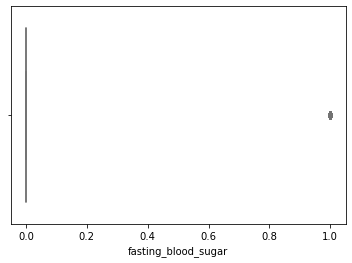

Feature:  rest_ecg


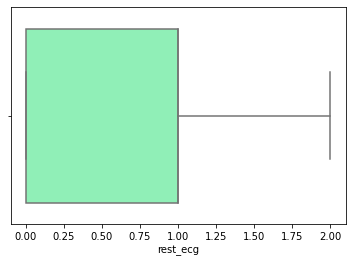

Feature:  thalach


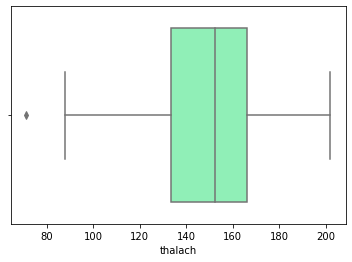

Feature:  exer_angina


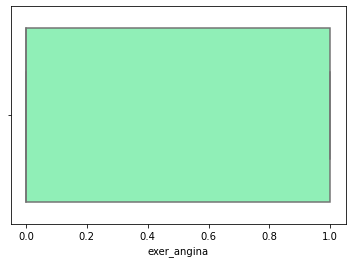

Feature:  old_peak


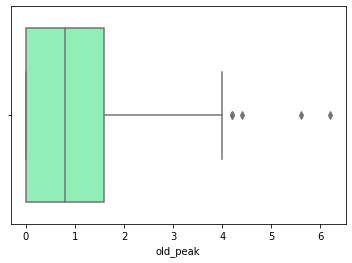

Feature:  slope


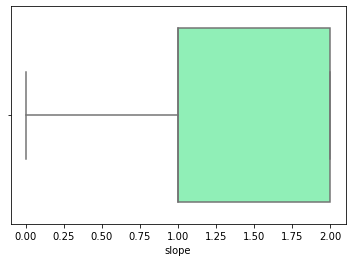

Feature:  ca


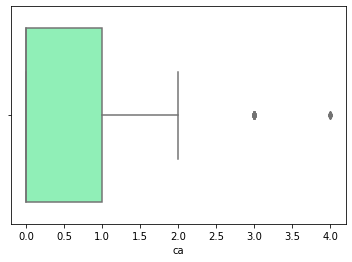

Feature:  thalassemia


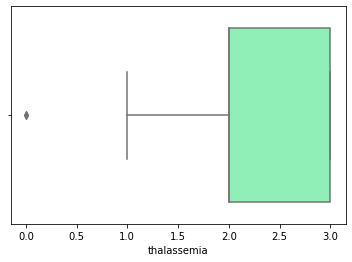

Feature:  target


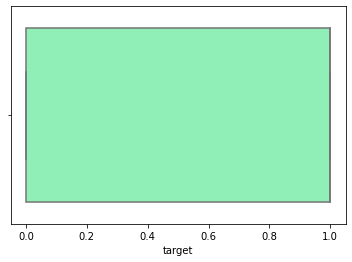

In [10]:
fig = plt.figure(figsize = (10,5))

for i in heart.columns:
    sns.boxplot(x  = heart[i] , data =  heart , palette ='rainbow')
    print('Feature: ' , i)
    plt.show()

In [11]:
l = [3,4,7,9,11,12]

def outlier(data):
    for column in data.iloc[:,l].columns:
        if data[column].dtype != 'str':
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR = Q3 -Q1
            lower = Q1 - (1.5 * IQR)
            upper = Q3 + (1.5 * IQR)
            data.loc[:,column]  = np.where(data[column].values>upper , upper , data[column].values)
            data.loc[:,column]  = np.where(data[column].values<lower , lower , data[column].values)
                                           
    return data


# Removing Outliers in the Data .

In [12]:
heart2 = outlier(heart)
heart2.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


Feature:  age


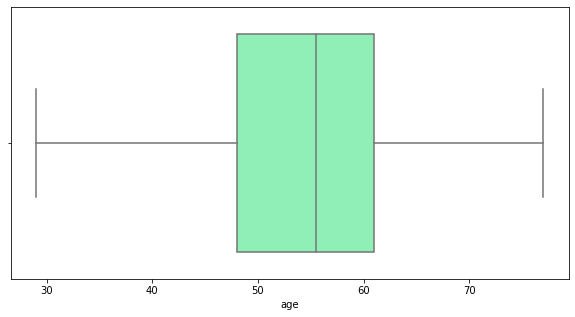

Feature:  gender


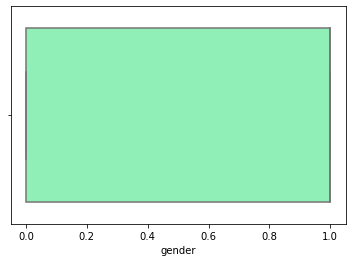

Feature:  chest_pain


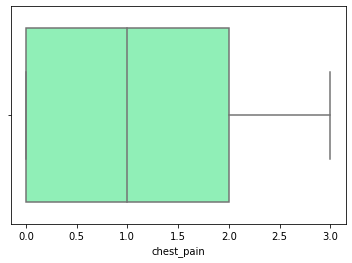

Feature:  rest_bps


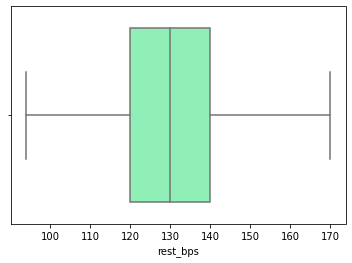

Feature:  cholestrol


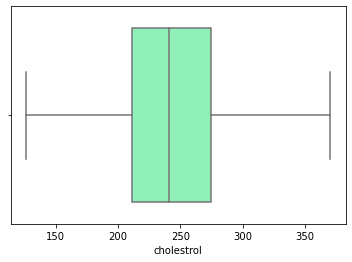

Feature:  fasting_blood_sugar


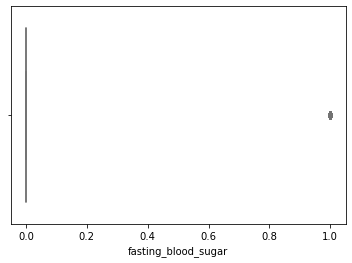

Feature:  rest_ecg


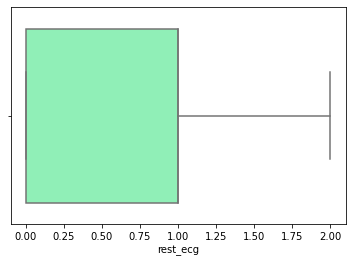

Feature:  thalach


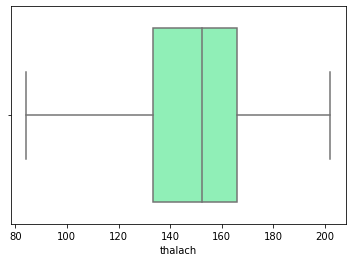

Feature:  exer_angina


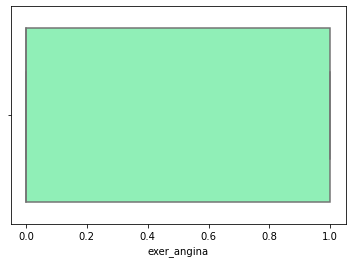

Feature:  old_peak


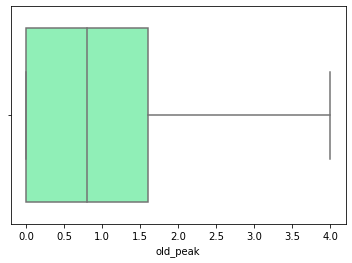

Feature:  slope


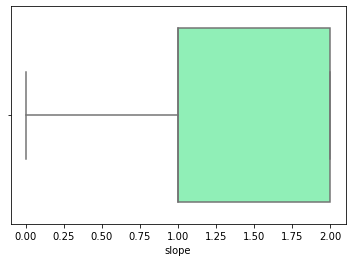

Feature:  ca


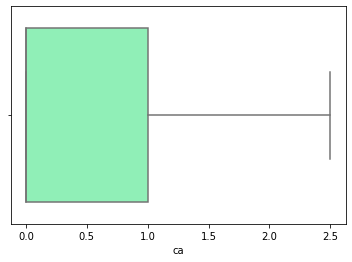

Feature:  thalassemia


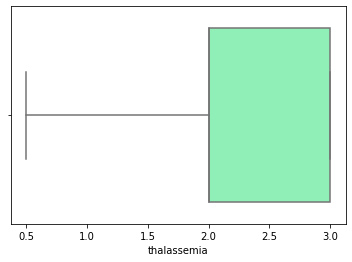

Feature:  target


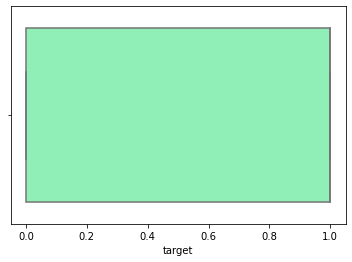

In [13]:
fig = plt.figure(figsize = (10,5))

for i in heart2.columns:
    sns.boxplot(x  = heart[i] , data =  heart2 , palette ='rainbow')
    print('Feature: ' , i)
    plt.show()

In [14]:
heart.describe(include='all')

# Descriptive statistics include those that summarize the central
# tendency

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.665563,2.317881,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,0.880241,0.601724,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.500000,3.000000,1.000000


In [15]:
display(heart.target.value_counts().to_frame() , heart.gender.value_counts().to_frame())

,target
1,164
0,138


,gender
1,206
0,96


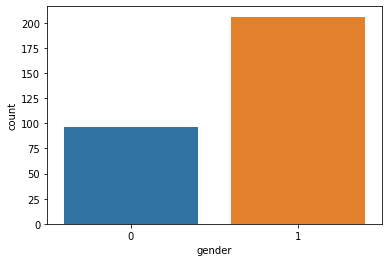

In [15]:
sns.countplot(heart['gender'])

In [16]:
heart.head(6)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0.0,1.0,1


In [17]:
heart.chest_pain.value_counts().sort_values()

3     23
1     50
2     86
0    143
Name: chest_pain, dtype: int64

In [18]:
# heart[heart['chest_pain']==3]

In [19]:
heart[heart['chest_pain']==3]['chest_pain'].count()

#  people with severe chest pain 

23

In [20]:
heart[heart['chest_pain']==2]['chest_pain'].count()

86

In [21]:
heart[heart['chest_pain']==1]['chest_pain'].count()

50

In [22]:
heart[heart['chest_pain']==0]['chest_pain'].count()

143

In [23]:
heart.groupby(['gender','chest_pain'])['chest_pain'].count().to_frame()

#  genderwise chest pain 
#  like 0 is minimum and 3 is maximum 

chest_pain
gender chest_pain            
0      0                   39
       1                   18
       2                   35
       3                    4
1      0                  104
       1                   32
       2                   51
       3                   19

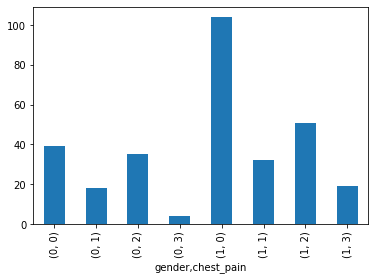

In [24]:
heart.groupby(['gender','chest_pain'])['chest_pain'].count().plot(kind='bar')

In [25]:
heart.groupby('gender')['chest_pain'].count()

gender
0     96
1    206
Name: chest_pain, dtype: int64

,min,max,mean
gender,,,
0,141.0,370.38,257.77
1,126.0,353.00,239.60


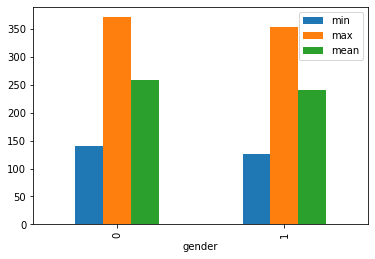

In [26]:
display(np.round(heart.groupby('gender')['cholestrol'].agg(['min','max','mean']), 2) ,
       
        np.round(heart.groupby('gender')['cholestrol'].agg(['min','max','mean']), 2).plot(kind = 'bar'))

#  from this we can see the minimum,average and maximum cholestrol levels in both the genders (Male and Female)
#  i have used numpy.round() function to convert the no. upto 2 decimal places .

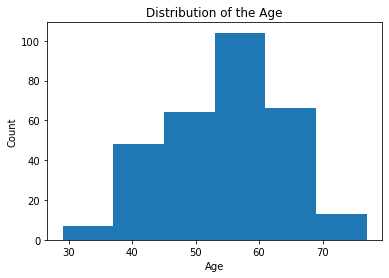

In [27]:
plt.hist(heart.age ,bins=6,histtype='bar')

plt.title('Distribution of the Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [28]:
heart.groupby('target').mean()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,133.789855,250.541667,0.159420,0.449275,139.196558,0.550725,1.553623,1.166667,1.094203,2.547101
1,52.585366,0.560976,1.371951,129.128049,241.031250,0.140244,0.591463,158.378049,0.140244,0.585366,1.591463,0.304878,2.125000


In [29]:
# plt.figure(figsize = (10,5))

# sns.distplot(heart)

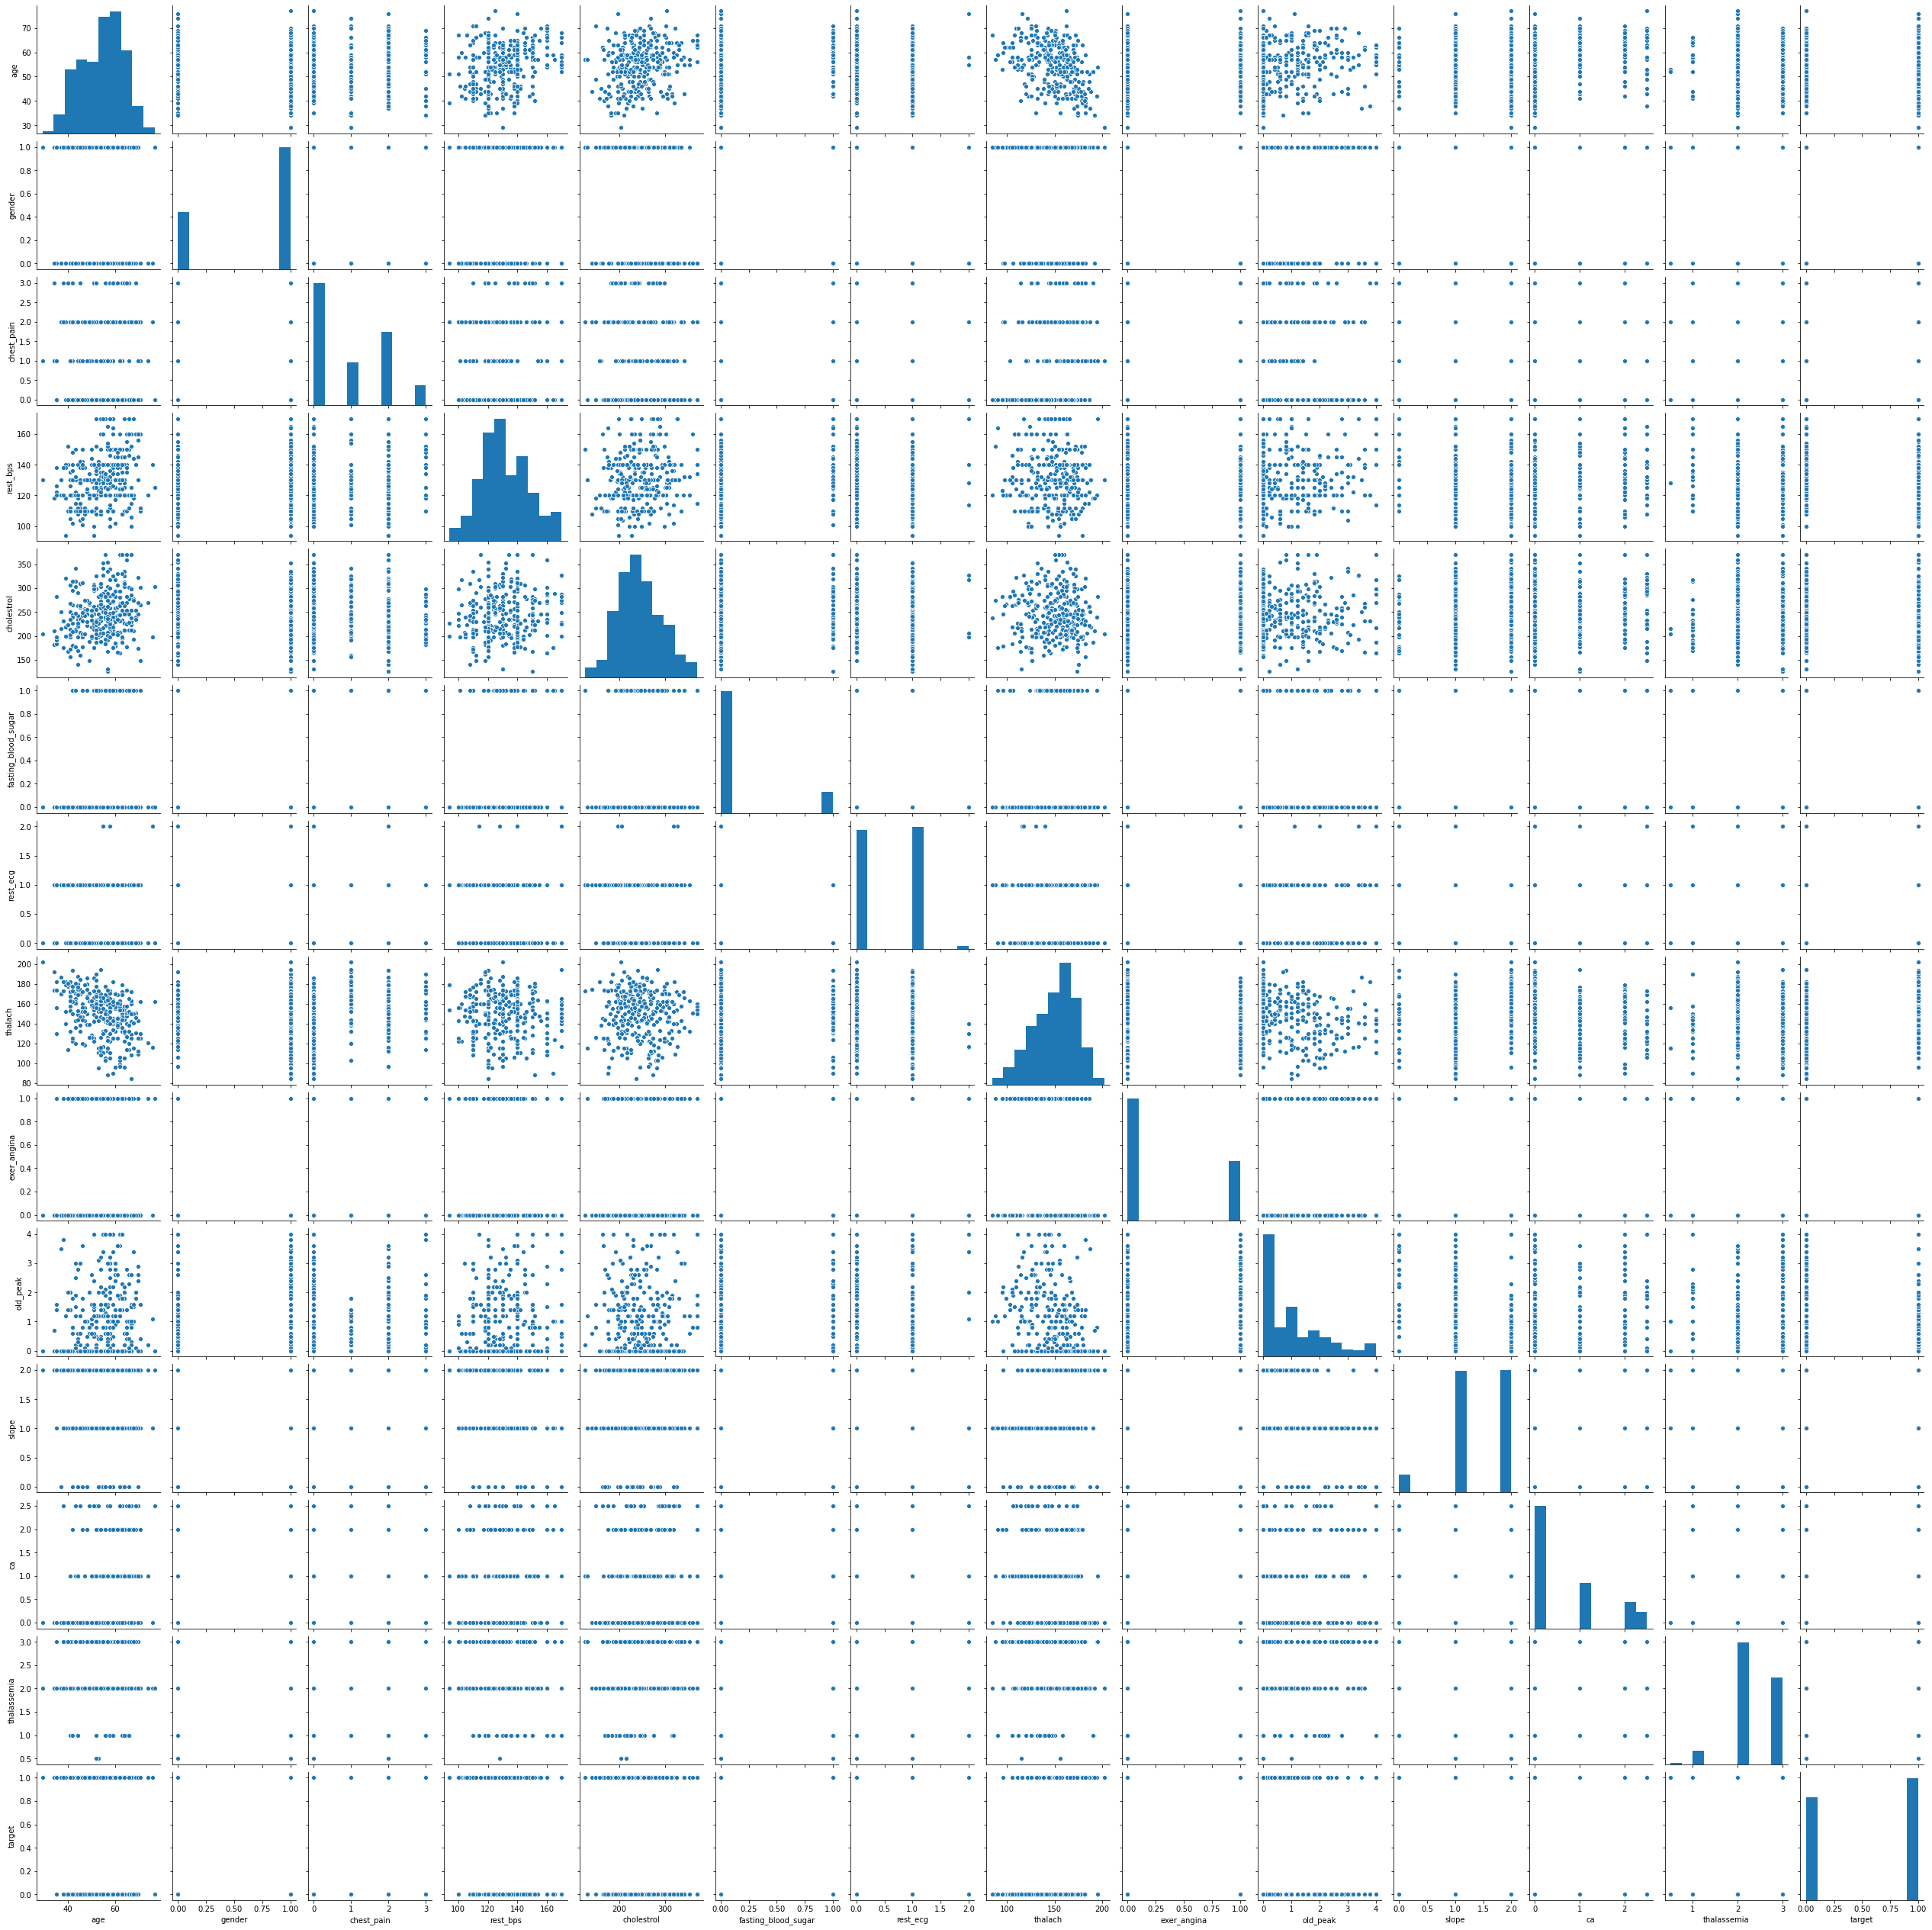

In [30]:
sns.pairplot(heart)

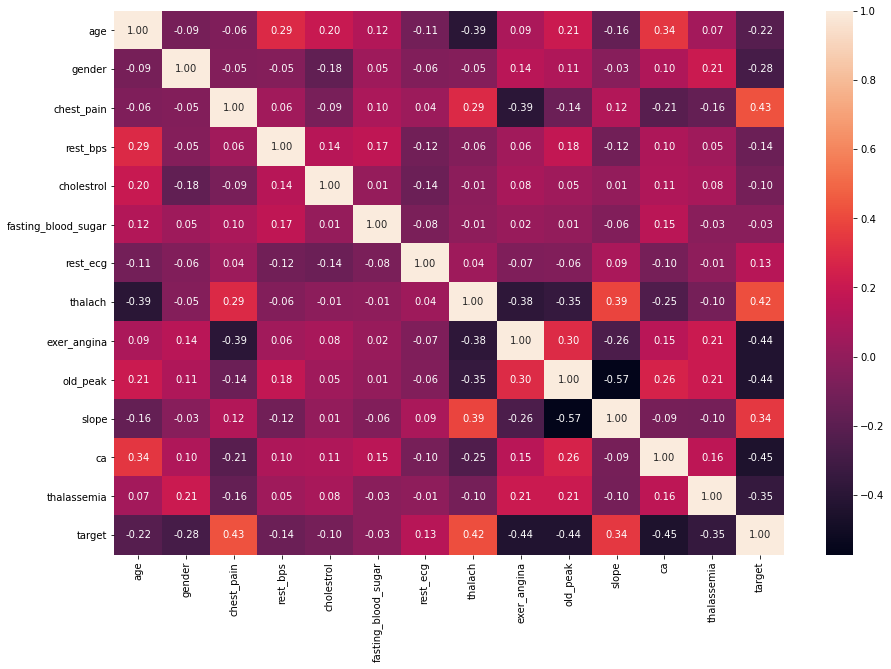

In [31]:
fig = plt.figure(figsize = (15,10))

sns.heatmap(heart.corr(), annot = True, fmt = '0.2f',  cmap="rocket")

# figsize(width , height)
# annot : If True, write the data value in each cell
# fmt : String formatting code to use when adding annotations.
# cmap : matplotlib colormap name or object, or list of colors

In [32]:
from sklearn.model_selection import train_test_split

# import train_test_split() in order to do splitting data.

In [33]:
x = heart.drop('target', axis = 1) # set the features for the respective target
y = heart.target                   # target 

In [34]:
x_train ,x_test ,y_train ,y_test = train_test_split (x,y , test_size = 0.10, random_state = 4)

# test_size parameter split the whole data into X train and X test
# random_state is used to freeze this spliting, it can be any numerical value

In [35]:
display('TRAINING_DATA',x_train.head(),y_train.head(),'TESTING_DATA',x_test.head(),y_test.head())

# displaying heading rows of both data

'TRAINING_DATA'

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
162,41,1,1,120.0,157.0,0,1,182.0,0,0.0,2,0.0,2.0
214,56,1,0,125.0,249.0,1,0,144.0,1,1.2,1,1.0,2.0
176,60,1,0,117.0,230.0,1,1,160.0,1,1.4,2,2.0,3.0
45,52,1,1,120.0,325.0,0,1,172.0,0,0.2,2,0.0,2.0
68,44,1,1,120.0,220.0,0,1,170.0,0,0.0,2,0.0,2.0


162    1
214    0
176    0
45     1
68     1
Name: target, dtype: int64

'TESTING_DATA'

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
296,63,0,0,124.0,197.000,0,1,136.0,1,0.0,1,0.0,2.0
170,56,1,2,130.0,256.000,1,0,142.0,1,0.6,1,1.0,1.0
18,43,1,0,150.0,247.000,0,1,171.0,0,1.5,2,0.0,2.0
43,53,0,0,130.0,264.000,0,0,143.0,0,0.4,1,0.0,2.0
246,56,0,0,134.0,370.375,0,0,150.0,1,1.9,1,2.0,3.0


296    0
170    0
18     1
43     1
246    0
Name: target, dtype: int64

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.model_selection import GridSearchCV

####  NOTE :****

Random sampling of training observations When training, each tree in a random forest learns from a random sample of the data points. The samples are drawn with replacement, known as bootstrapping, which means that some samples will be used multiple times in a single tree.

In [38]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler 

sc = StandardScaler()

min_max = MinMaxScaler()

x_train_scaled = min_max.fit_transform(x_train)

x_test_scaled = min_max.fit_transform(x_test) 

In [40]:
# randomized Gridsearch cv = will not run all the combinations, will pic parameter values at random and train the model with them

# Grid Search CV helps to find best set of parameters by training the algorithm and seeing the results
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [1000,1100,1150,1200],
             'max_depth': [30,35,38,44,46,47,48]
             } #list of estimators i.e number of Tress to be Considered for Training

gs = GridSearchCV(clf, param_grid=param_dist, cv = 4) # CV = 3 data will be split into train & test folds 3 times

gs.fit(x_train_scaled, y_train) # Fitting Gridsearch to Trainig Data

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 35, 38, 44, 46, 47, 48],
                         'n_estimators': [1000, 1100, 1150, 1200]})

In [41]:
print(gs.best_score_)
# evaluated on a particular fold out of the 5-fold split that you gave for CV

0.8228160667251976


In [42]:
print(gs.best_params_)
 # Parameter that gave the best results.

{'max_depth': 46, 'n_estimators': 1150}


In [43]:
gs.classes_

array([0, 1], dtype=int64)

In [44]:
clf2 = RandomForestClassifier(max_depth=35,n_estimators=1150)

In [45]:
clf2.fit(x_train_scaled, y_train) # now training the data on the best paramaters above found !

RandomForestClassifier(max_depth=35, n_estimators=1150)

In [46]:
rf_predicted = clf2.predict(x_test_scaled)
rf_predicted 

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [47]:
rf_df  = pd.DataFrame({'Predicted':rf_predicted , 'Actual':y_test})
rf_df.sample(5)

,Predicted,Actual
297,0,0
70,1,1
237,0,0
257,0,0
63,1,1


In [48]:
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [49]:
print(classification_report(y_test, rf_predicted))
print("The RF model accuracy on Test data is %s:", accuracy_score(y_test, rf_predicted))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.75      1.00      0.86        15

    accuracy                           0.84        31
   macro avg       0.88      0.84      0.84        31
weighted avg       0.88      0.84      0.84        31

The RF model accuracy on Test data is %s: 0.8387096774193549


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
x_trainl = x_train_scaled.copy()
x_testl = x_test_scaled.copy()
y_trainl = y_train.copy()
y_testl  = y_test.copy()

In [19]:
# this has been used below for generating multiple values for grid search .

np.logspace(-3,3,7) # np.logspace is generating an array of numbers spaced evenly on a log scale.

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [52]:
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log  =  LogisticRegression()
log_cv = GridSearchCV(log,grid,cv=10)
log_cv.fit(x_trainl,y_trainl)

print("tuned hpyerparameters :(best parameters) ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8412698412698413


__Below is the list of top hyper-parameters for Logistic regression.__

__Penalty__: This hyper-parameter is used to specify the type of normalization used.  Few of the values for this hyper-parameter can be l1, l2 or none. The default value is l2.

__Inverse of regularization:__ This hyper-parameter is denoted as C. Smaller values of this hyper-parameter indicates a stronger 
regularization. Default value is 1.0

__Random state :__ random_state is the seed used by the random number generator. Default value is None.

__Solver:__ This indicates which algorithm to use in the optimization problem. Default value is lbfgs. other possible values are newton-cg, liblinear, sag, saga.

__Max iter :__ max_iter represents maximum number of iterations taken for the solvers to converge a training process.

__RIDGE(L2):__  it cannot be zero beacause of squaring ,
it will reduce the importance of a feature depending on the penalty, 
means it can handle the multicollinear data .kisi feature ko km importance dedega ya kisi ko zyada but elimenate nahi krega . 

In [53]:
logreg2=LogisticRegression(C=1000,penalty="l2")
logreg2.fit(x_trainl,y_trainl)
print("score",logreg2.score(x_testl,y_testl))

score 0.7419354838709677


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
clf_gradient = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1,
                                          random_state=42).fit(x_train_scaled, y_train)

In [57]:
clf_gradient

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=1000,
                           random_state=42)

In [58]:
predicted_gradient  = clf_gradient.predict(x_test_scaled)

In [59]:
preidcted_gradient_train = clf_gradient.predict(x_train_scaled)

In [60]:
accuracy_score(preidcted_gradient_train,y_train)

1.0

In [61]:
accuracy_score(predicted_gradient,y_test)

0.8387096774193549